In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.path.exists("/content/drive/MyDrive/h1b_cleaned_10000.csv")

True

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/h1b_cleaned_10000.csv")
df.head()


,CASE_STATUS,VISA_CLASS,JOB_TITLE,EMPLOYER_NAME,WORKSITE_STATE,PREVAILING_WAGE,processing_time_days
0,Certified,H-1B,"Senior Manager, Corporate Business Development",FMR LLC,NY,116189.0,66
1,Certified,H-1B,Delivery Manager,"Bed Bath & Beyond, Inc.",NJ,122221.0,89
2,Certified,H-1B,Software Engineer,Microsoft Corporation,WA,113381.0,143
3,Certified,H-1B,Technical Lead,IBM INDIA PRIVATE LIMITED,MA,92498.0,88
4,Certified,H-1B,AWS Developer,"Vigilant Technologies, LLC",MI,79498.0,177


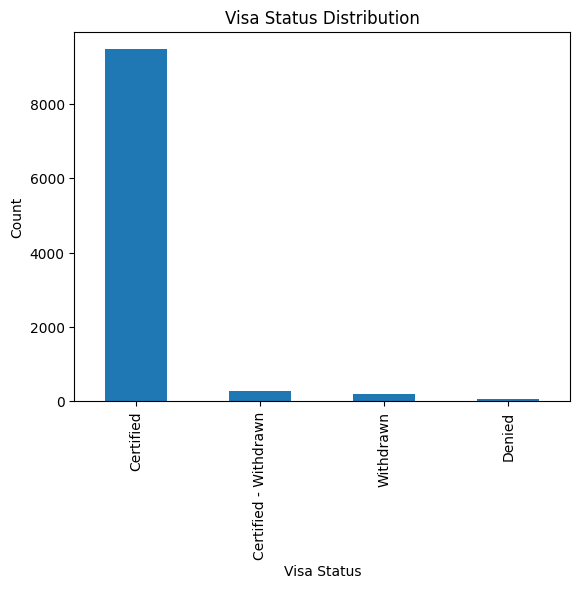

In [ ]:
import matplotlib.pyplot as plt

df['CASE_STATUS'].value_counts().plot(kind='bar')
plt.title("Visa Status Distribution")
plt.xlabel("Visa Status")
plt.ylabel("Count")
plt.show()


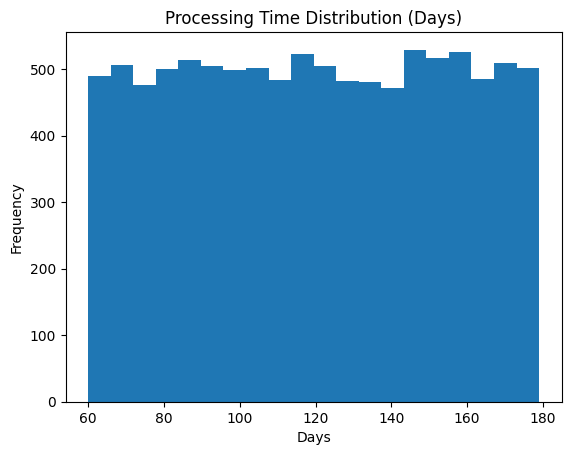

In [ ]:
df['processing_time_days'].plot(kind='hist', bins=20)
plt.title("Processing Time Distribution (Days)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


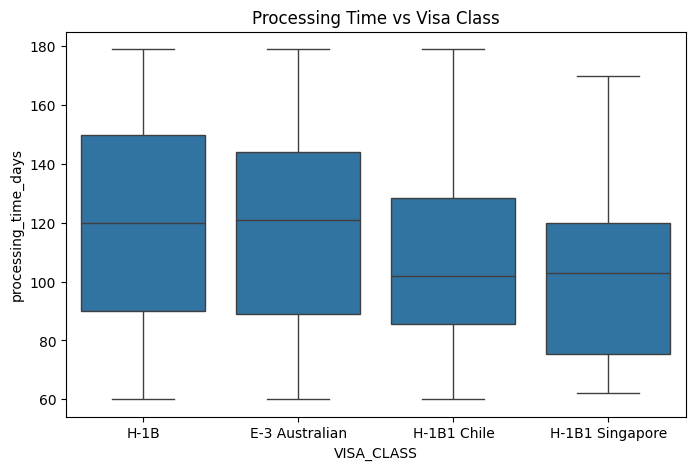

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='VISA_CLASS', y='processing_time_days', data=df)
plt.title("Processing Time vs Visa Class")
plt.show()


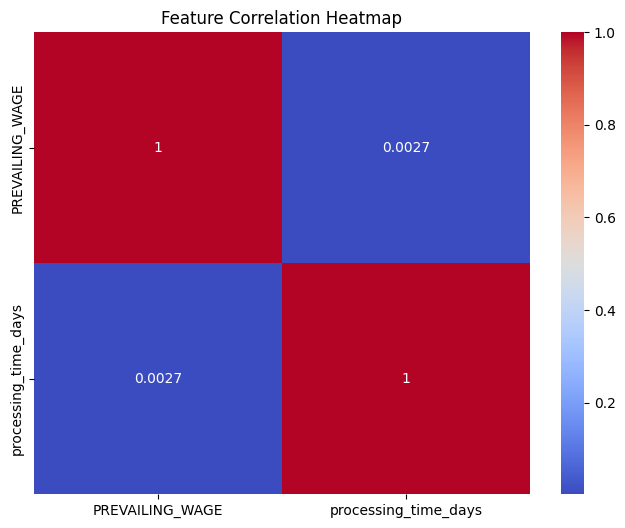

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
df['state_avg_processing_time'] = (
    df.groupby('WORKSITE_STATE')['processing_time_days']
      .transform('mean')
)


In [ ]:
df['wage_band'] = pd.cut(
    df['PREVAILING_WAGE'],
    bins=[0,50000,100000,150000,300000],
    labels=['Low','Medium','High','Very High']
)


In [ ]:
df['wage_band'] = df['wage_band'].astype(str)


In [ ]:
import numpy as np

df['season_index'] = np.random.choice(
    ['Q1','Q2','Q3','Q4'],
    size=len(df)
)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['wage_band', 'season_index']:
    df[col] = encoder.fit_transform(df[col])


In [ ]:
df.to_csv("/content/drive/MyDrive/h1b_feature_engineered.csv", index=False)
print(" Milestone 2 completed")


 Milestone 2 completed
